## Backpropagation Exercise
In this exercise we will use backpropagation to train a multi-layer perceptron (with a single hidden layer).  We will experiment with different patterns and see how quickly or slowly the weights converge.  We will see the impact and interplay of different parameters such as learning rate, number of iterations, and number of data points.

In [1]:
#Preliminaries
#from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Fill out the code below so that it creates a multi-layer perceptron with a single hidden layer (with 4 nodes) and trains it via back-propagation.  Specifically your code should:

1. Initialize the weights to random values between -1 and 1
1. Perform the feed-forward computation
1. Compute the loss function
1. Calculate the gradients for all the weights via back-propagation
1. Update the weight matrices (using a learning_rate parameter)
1. Execute steps 2-5 for a fixed number of iterations
1. Plot the accuracies and log loss and observe how they change over time


Once your code is running, try it for the different patterns below.

- Which patterns was the neural network able to learn quickly and which took longer?
- What learning rates and numbers of iterations worked well?
- If you have time, try varying the size of the hidden layer and experiment with different activation functions (e.g. ReLu)

shape of x_mat_full is (500, 3)
shape of y is (500,)


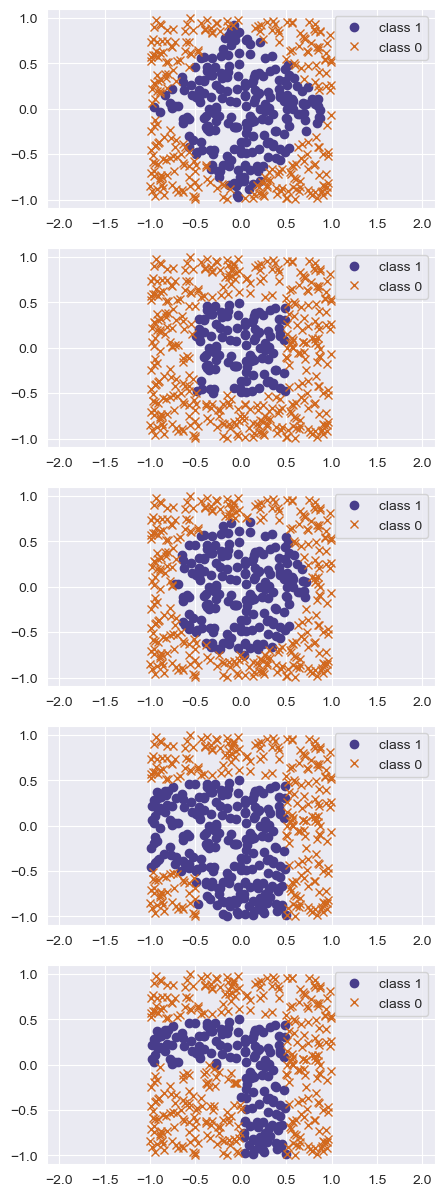

In [2]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)
## The goal is then to learn the mapping from x to y using a neural network via back-propagation

num_obs = 500
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)

# PICK ONE PATTERN BELOW and comment out the rest.

# # Circle pattern
y_circle = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # Diamond Pattern
y_diamond = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

# # Centered square
y_square = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

# # Thick Right Angle pattern
y_thickangle = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
y_thinangle = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)

ys = [y_diamond,y_square,y_circle,y_thickangle,y_thinangle]
y_names = ["Diamond", "Square", "Circle", "Thick Right Angle", "Thin Right Angle"]
print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(ys[0].shape))

fig, axes = plt.subplots(5, figsize=(5, 15))
for i, ax in enumerate(axes):
    ax.plot(x_mat_full[ys[i]==1, 0],x_mat_full[ys[i]==1, 1], 'o', label='class 1', color='darkslateblue')
    ax.plot(x_mat_full[ys[i]==0, 0],x_mat_full[ys[i]==0, 1], 'x', label='class 0', color='chocolate')

    ax.legend(loc='best')
    ax.axis('equal')

Here are some helper functions

In [13]:
def sigmoid(x):
    """
    Sigmoid function
    """
    return 1.0 / (1.0 + np.exp(-x))


def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)


def forward_pass(W_1, W_2):
    """
    Does a forward computation of the neural network
    Takes the input `x_mat` (global variable) and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    global x_mat
    global y
    global num_
    # First, compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W_1)
    a_2 = sigmoid(z_2)
    z_3 = np.dot(a_2, W_2)
    y_pred = sigmoid(z_3).reshape((len(x_mat),))
    # Now compute the gradient
    J_z_3_grad = -y + y_pred
    J_W_2_grad = np.dot(J_z_3_grad, a_2)
    a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2))
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)
    
    # return
    return y_pred, gradient


def plot_loss_accuracy(lr, name, loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle(f'{name}, lr:{lr}')
    
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

Complete the pseudocode below

TAXA DE APRENDIZADO: 0.001
Diamond
0.777125515864196
0.538
0.683675231291101
0.502
0.6662021922008129
0.59
0.6069988100439416
0.736
Square
0.5477247209194285
0.77
0.5386204906535069
0.77
0.534197018744957
0.77
0.5215182484584129
0.77
Circle
0.7042672500217384
0.61
0.6652870190416027
0.61
0.6540550264643662
0.61
0.6105317671395845
0.61
Thick Right Angle
0.7765546188199125
0.514
0.5632261368491693
0.724
0.532246619221531
0.742
0.491918877385482
0.822
Thin Right Angle
0.6298088930299013
0.68
0.6181944747633104
0.68
0.6058852448568806
0.68
0.584064735544302
0.68
TAXA DE APRENDIZADO: 0.01
Diamond
0.777125515864196
0.538
0.2823822685558884
0.906
0.18639844893099433
0.934
0.16058456942328486
0.946
Square
0.5477247209194285
0.77
0.24938636927247115
0.93
0.13029133797036466
0.954
0.11523064481260488
0.956
Circle
0.7042672500217384
0.61
0.2050787273640059
0.93
0.15196114084642687
0.948
0.18275708327871587
0.936
Thick Right Angle
0.7765546188199125
0.514
0.14107544795813634
0.968
0.08455294420910

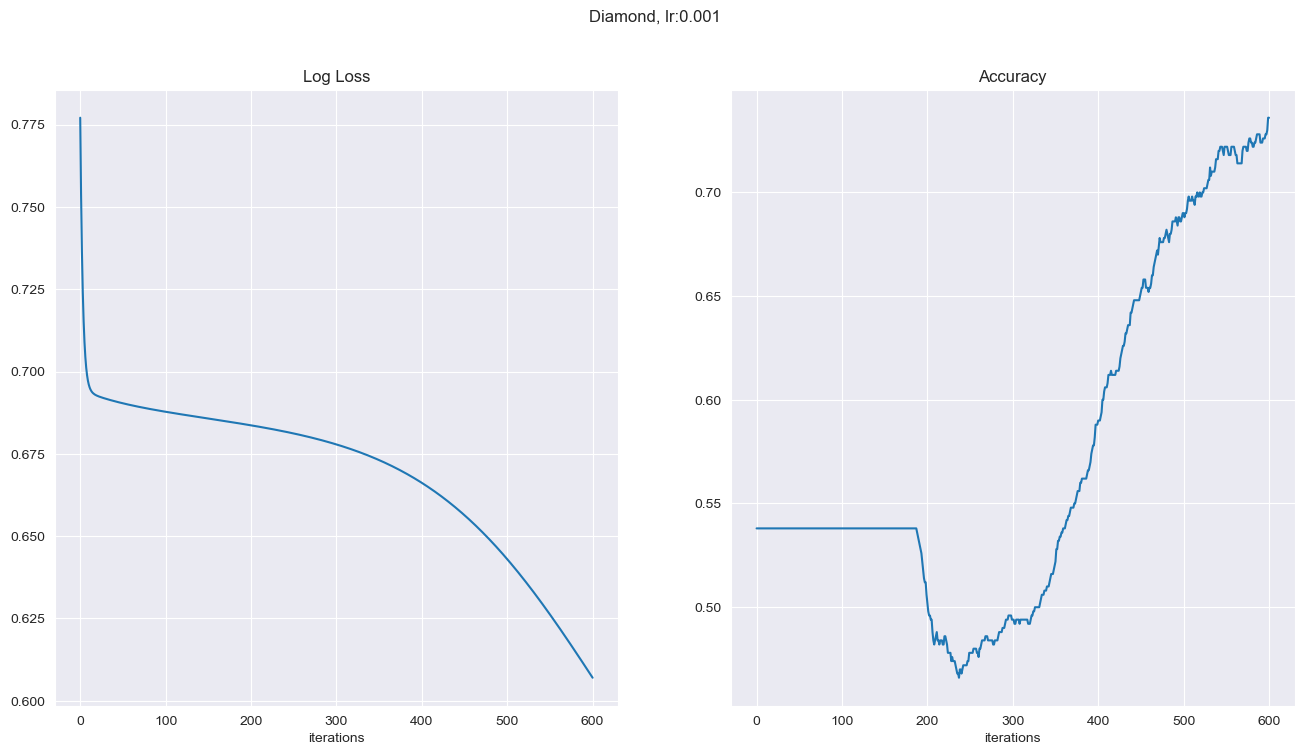

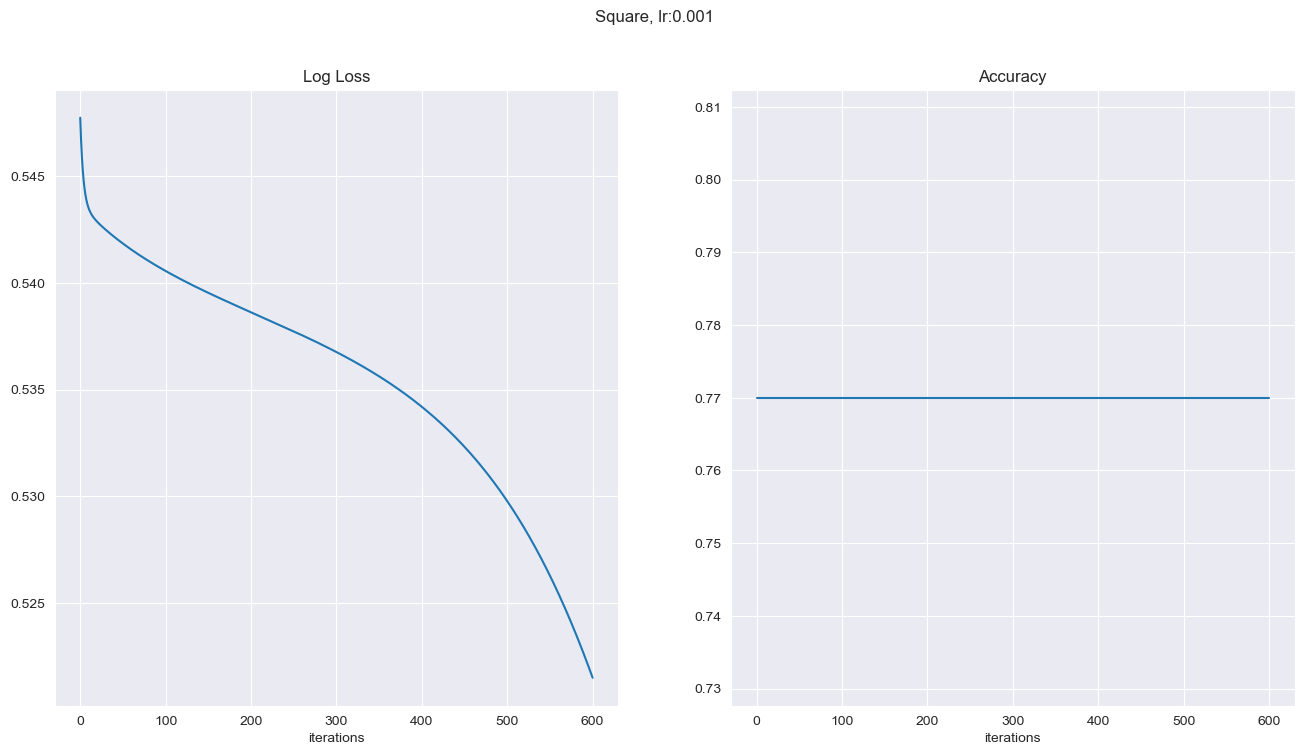

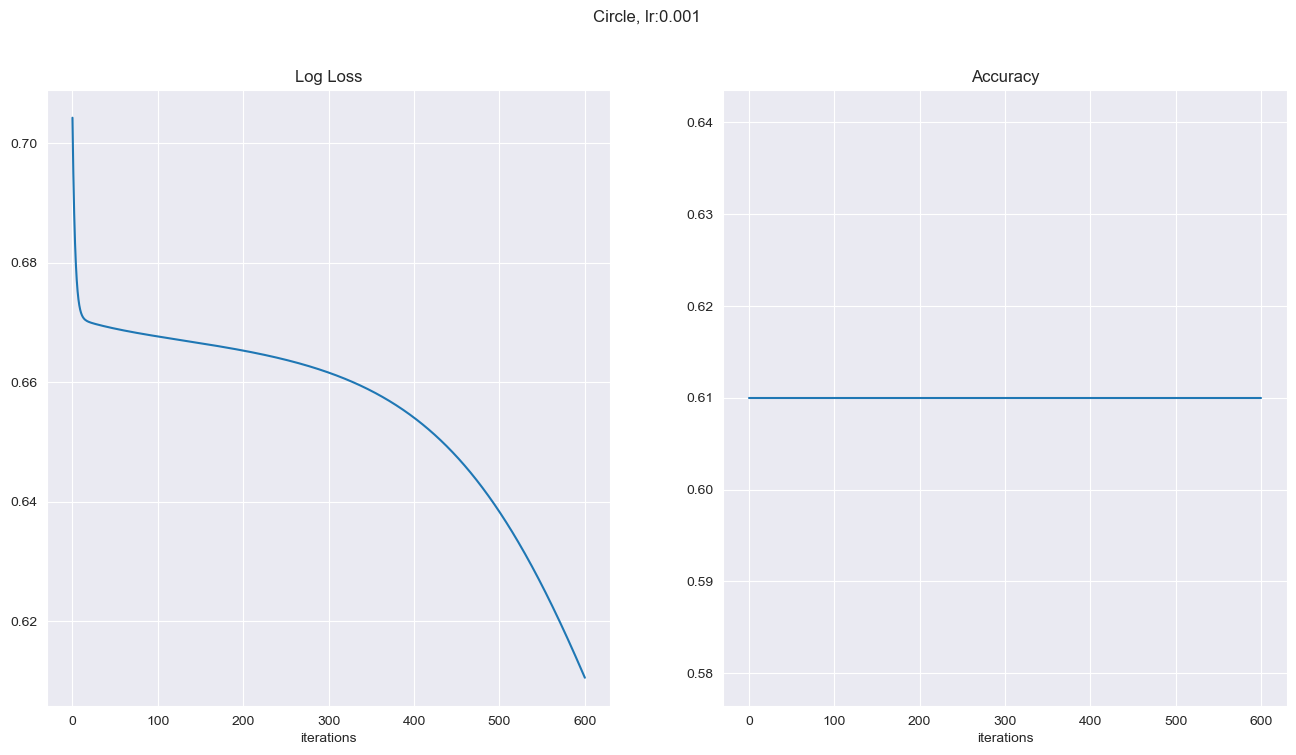

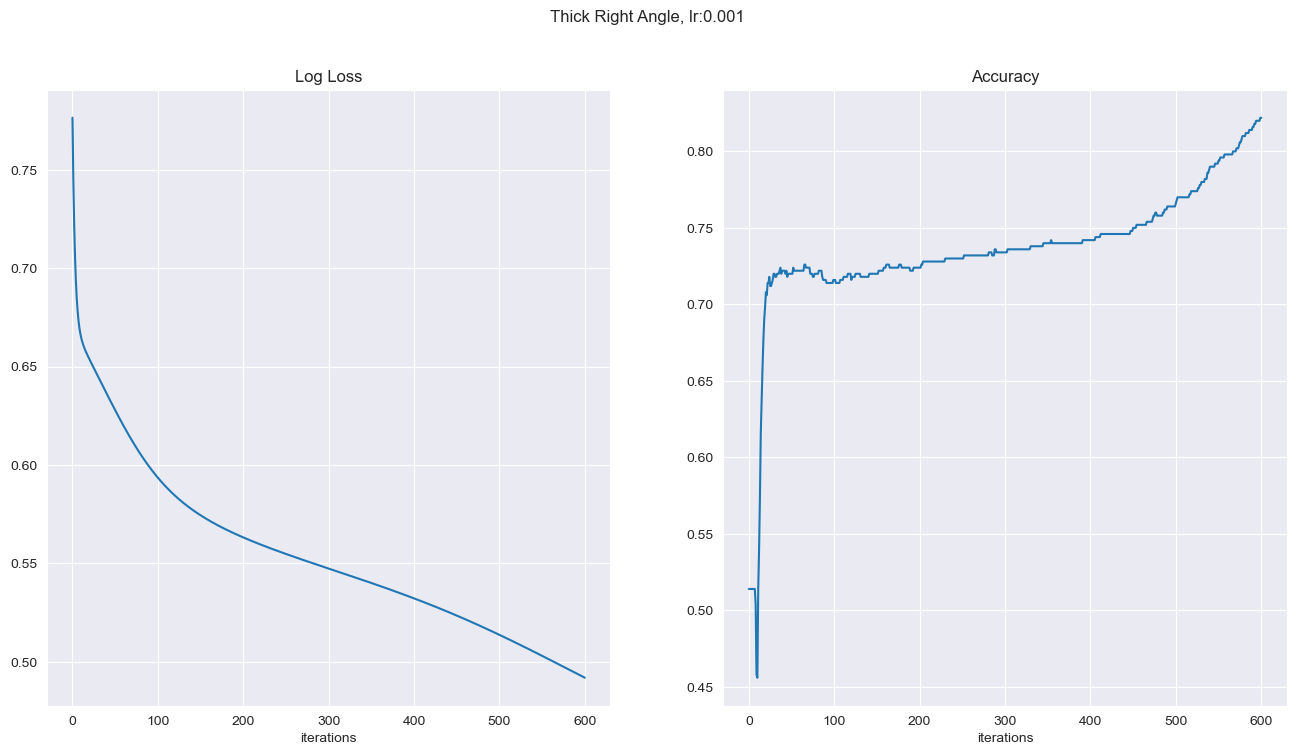

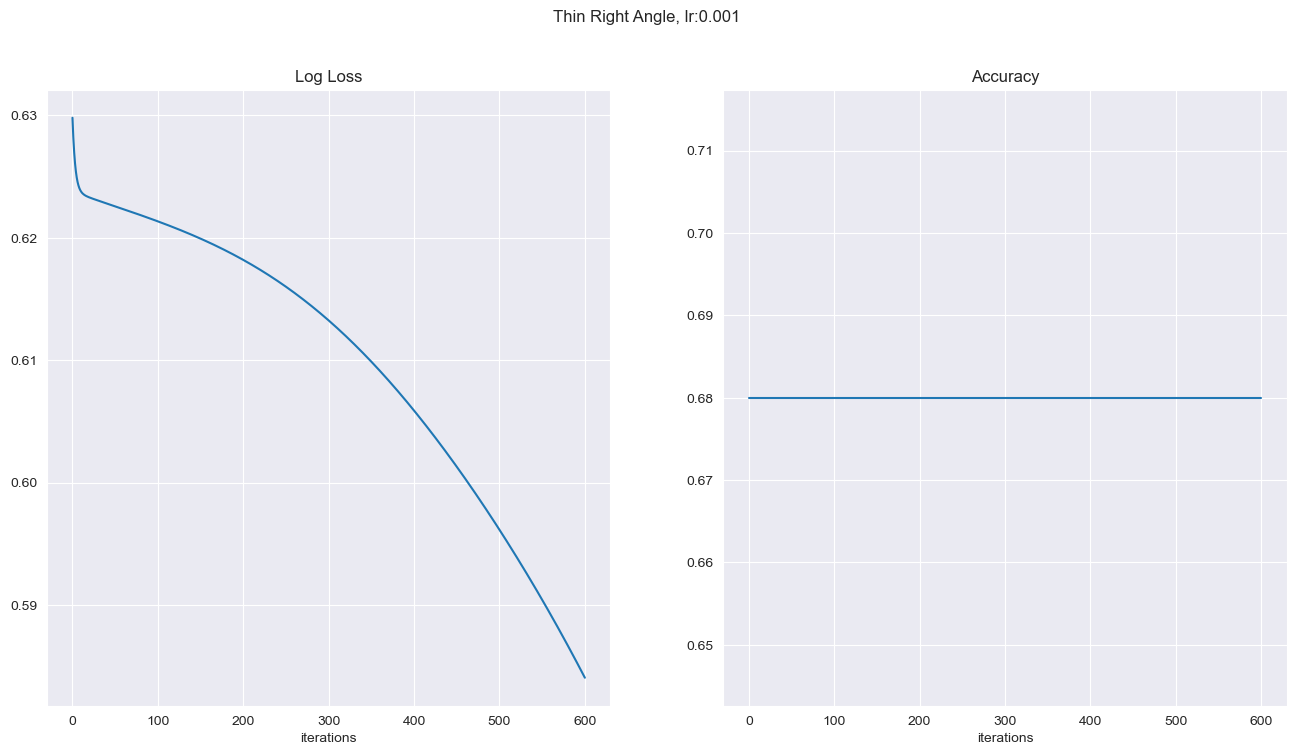

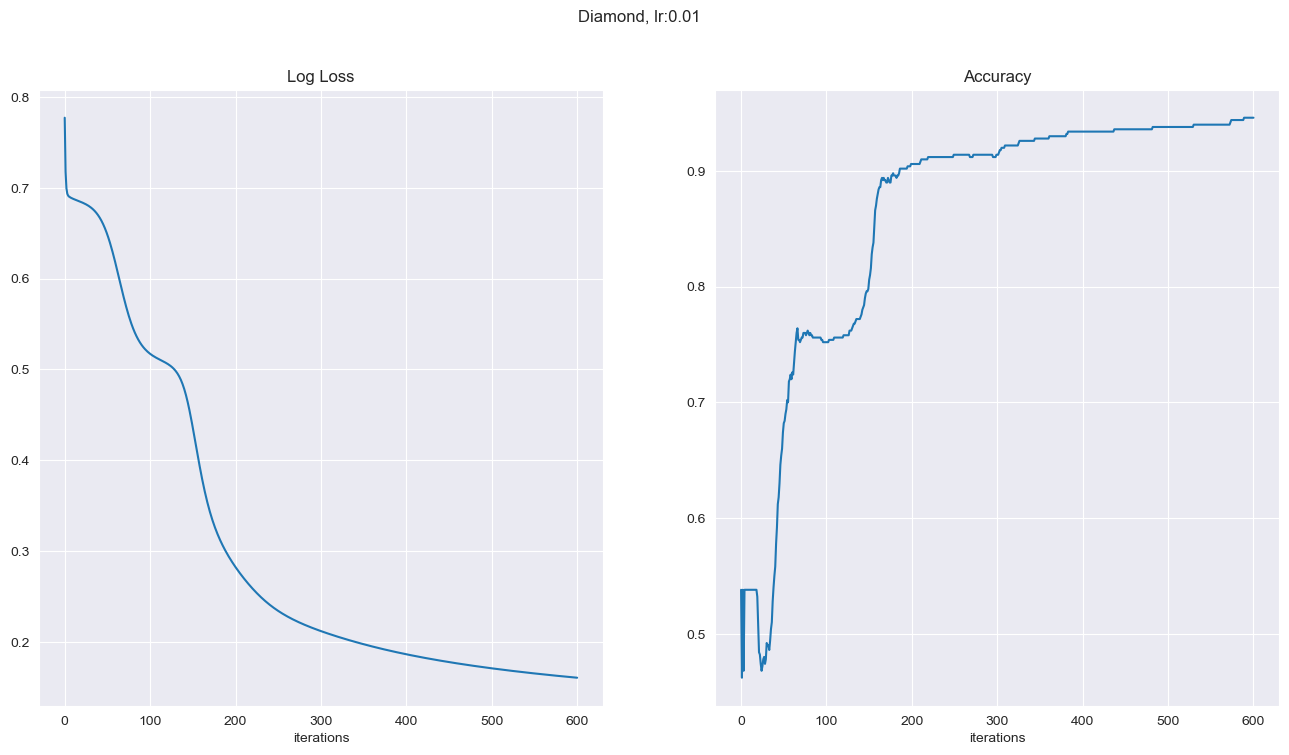

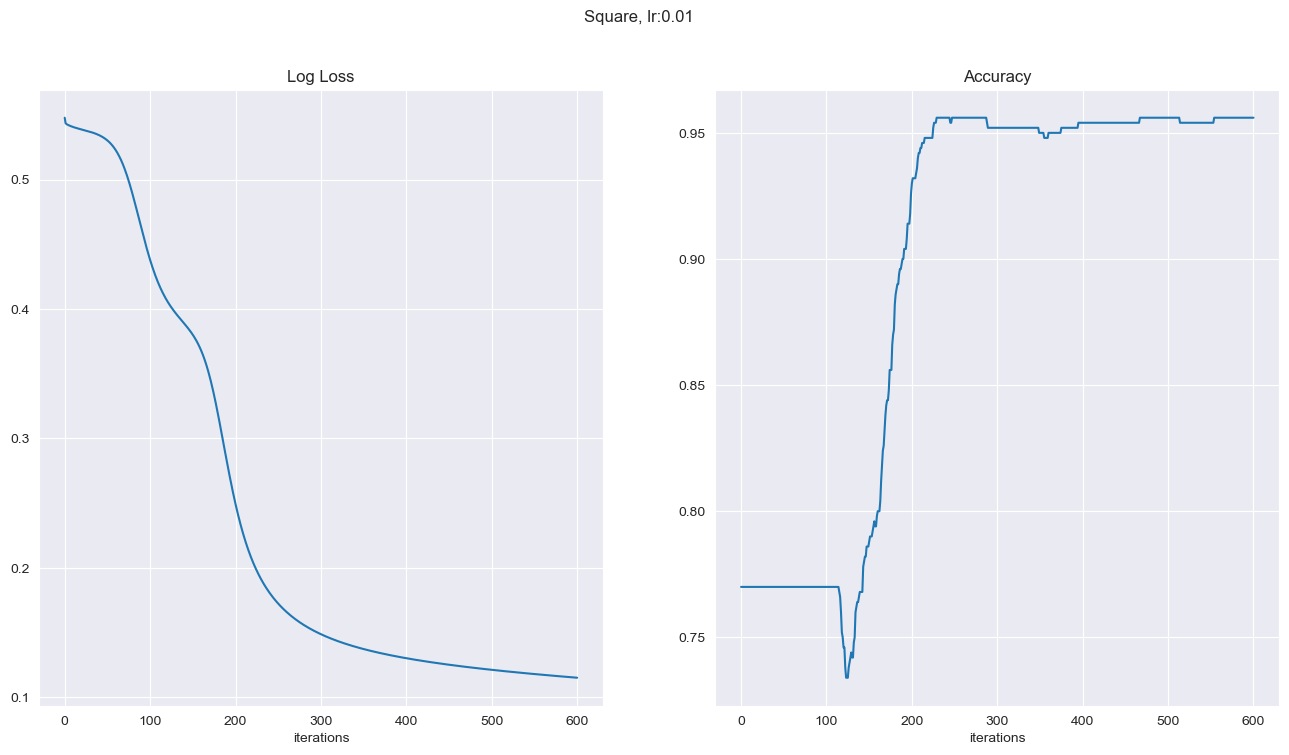

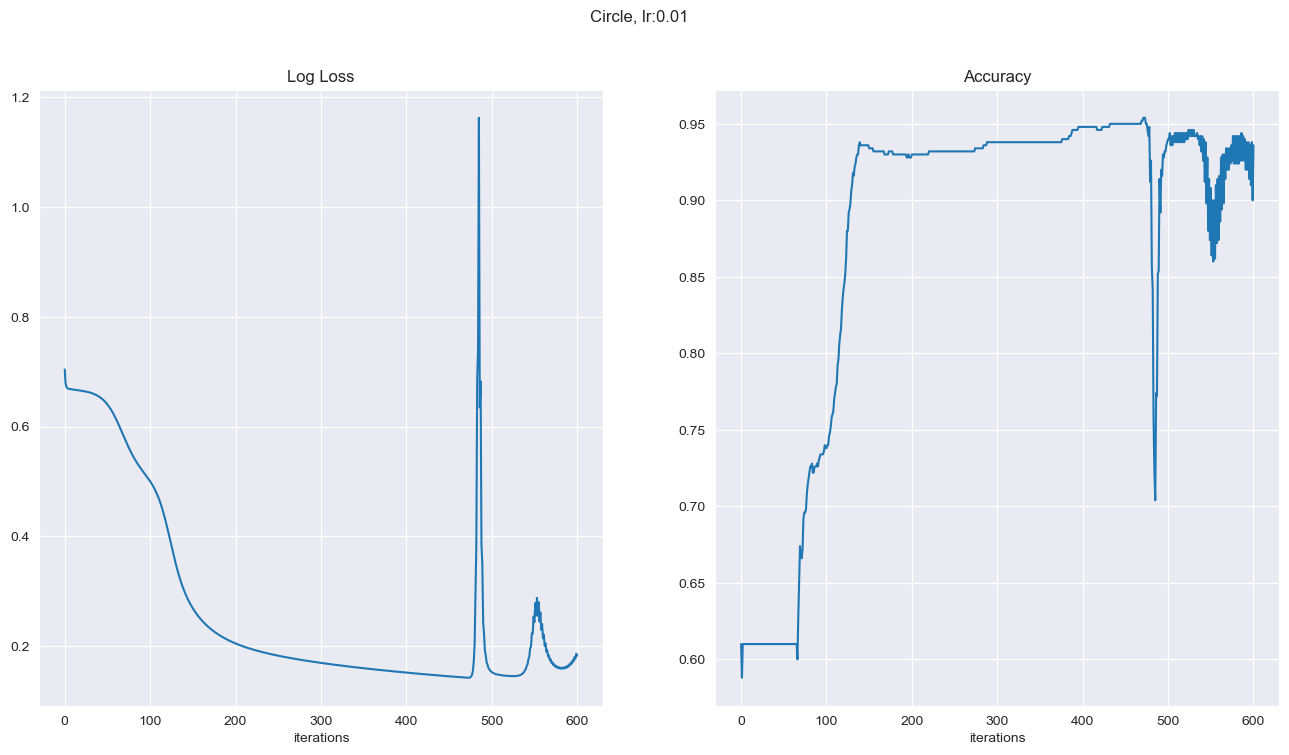

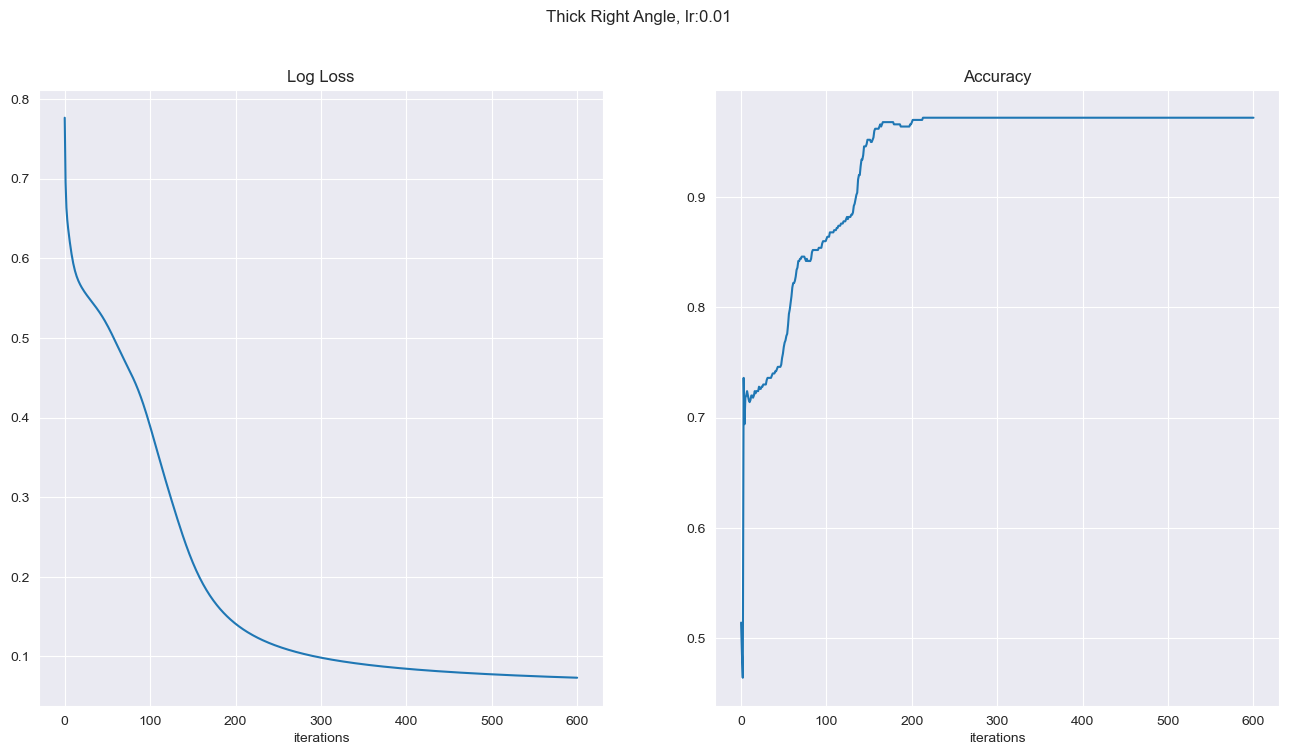

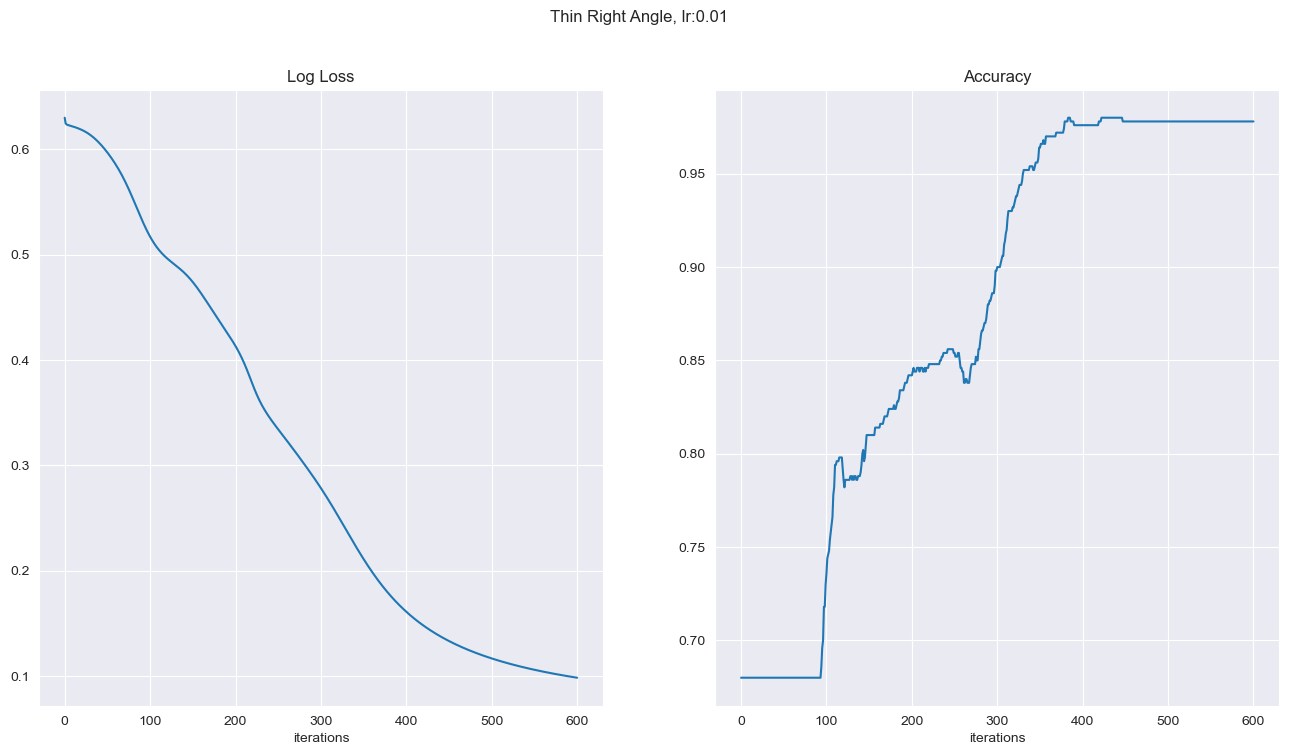

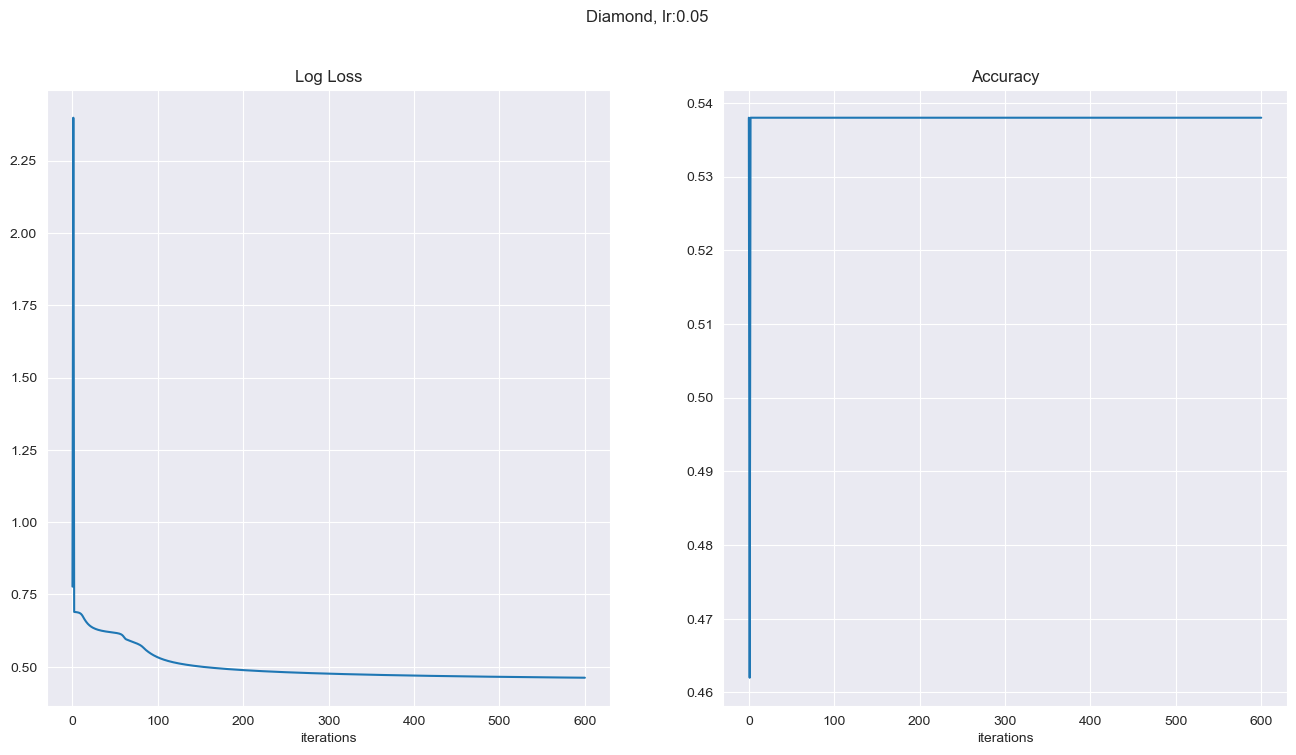

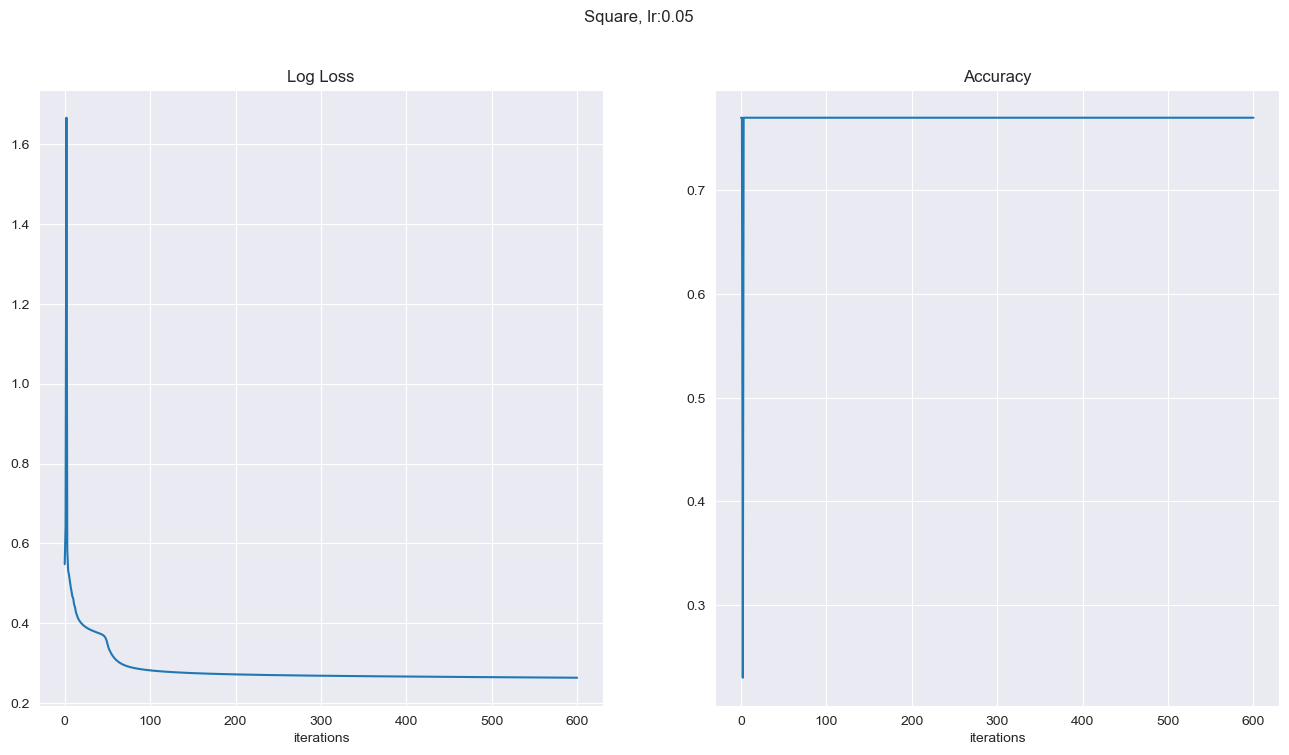

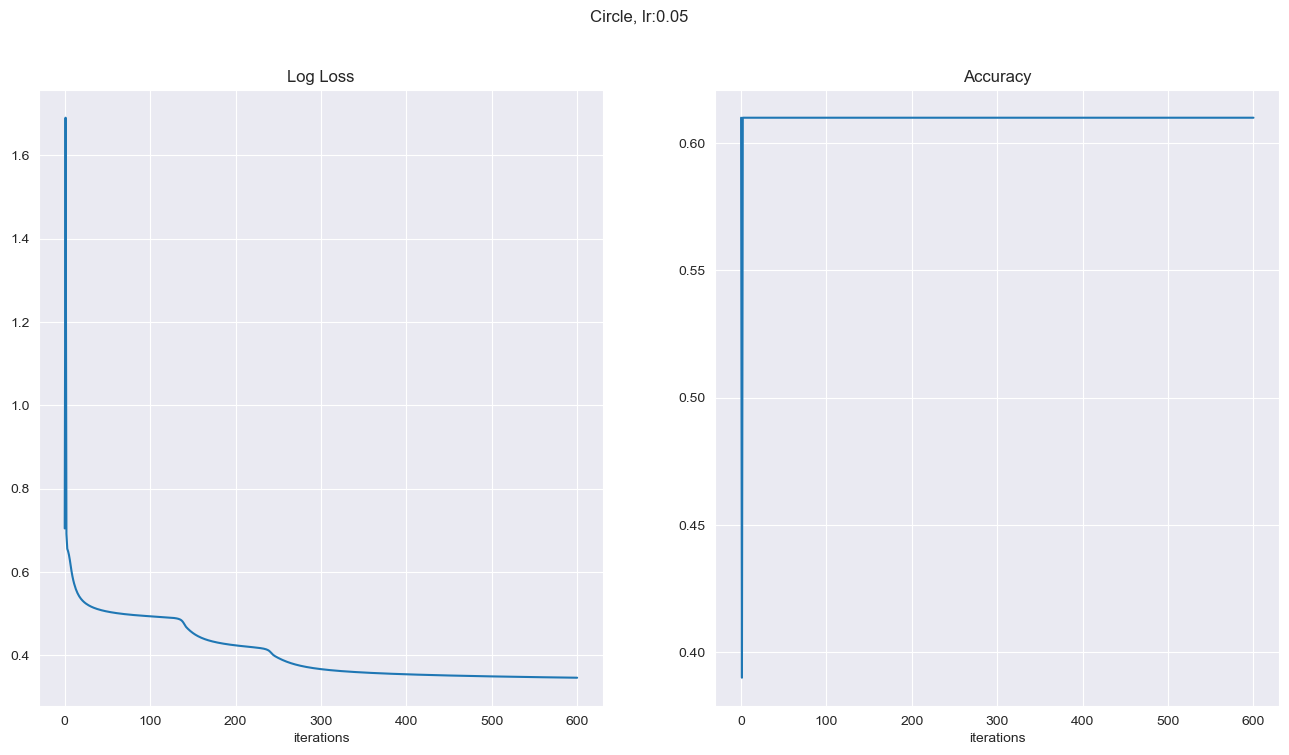

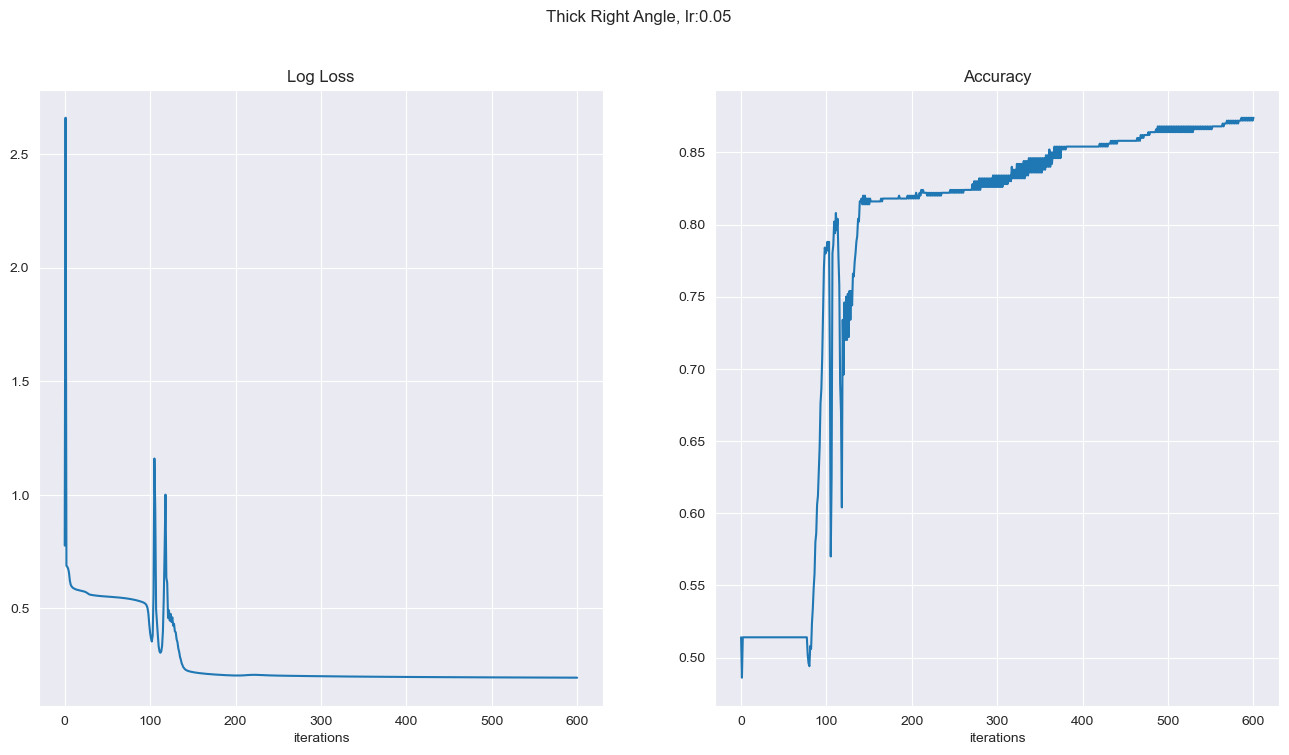

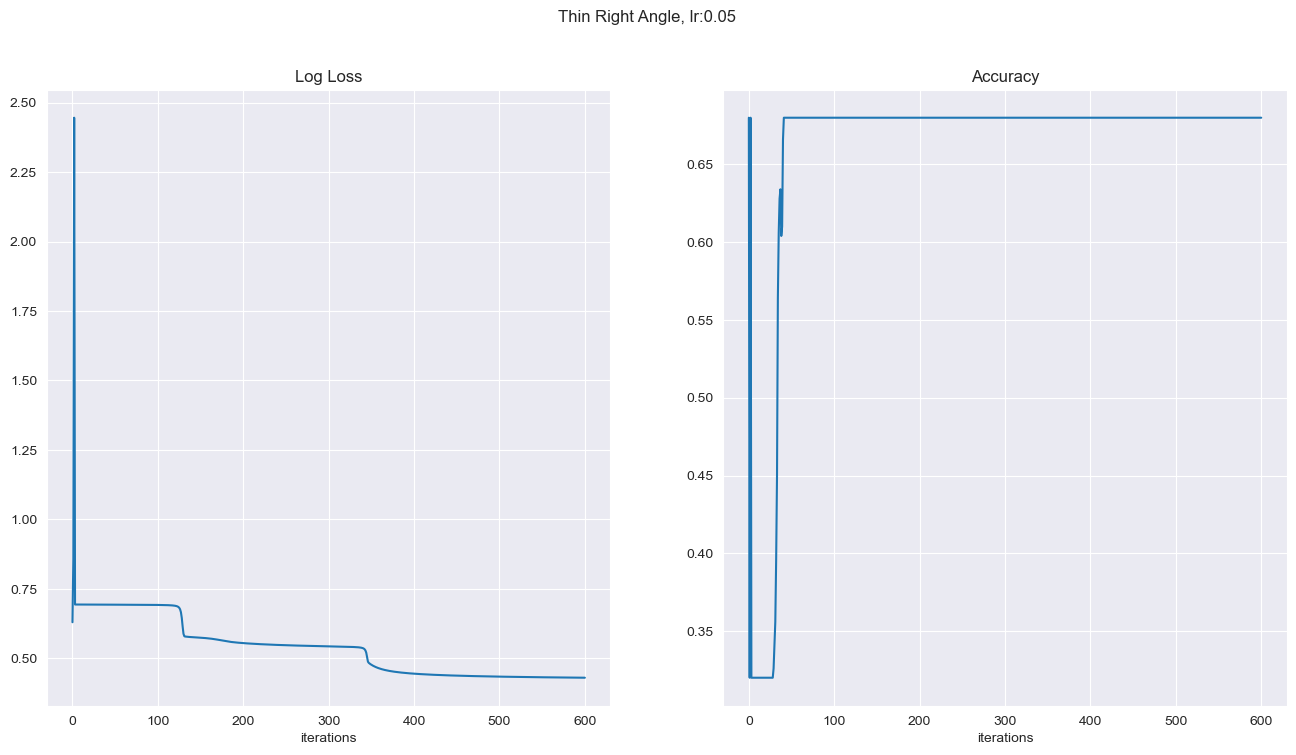

In [14]:
#### Initialize the network parameters
from sklearn.metrics import accuracy_score

np.random.seed(1241)
W1 = np.random.uniform(-1, 1, (3,4))
W2 = np.random.uniform(-1, 1, 4)
for learning_rate in [0.001, 0.01, 0.05]:
    print(f'TAXA DE APRENDIZADO: {learning_rate}')
    for j, y in enumerate(ys):
        W_1, W_2 = W1.copy(), W2.copy()
        num_iter = 600
        x_mat = x_mat_full


        loss_vals, accuracies = [], []
        print(y_names[j])
        for i in range(num_iter+1):
            ### Do a forward computation, and get the gradient
            y_pred, grad = forward_pass(W_1, W_2)
            ## Update the weight matrices
            W_1 -= grad[0]*learning_rate
            W_2 -= grad[1]*learning_rate
            ### Compute the loss and accuracy
            loss_vals.append(loss_fn(y, y_pred))
            accuracies.append(accuracy_score(y, y_pred.round(), normalize=True))
            ## Print the loss and accuracy for every 200th iteration
            if not i%200:
                print(loss_vals[-1])
                print(accuracies[-1])
        plot_loss_accuracy(learning_rate, y_names[j], loss_vals, accuracies)